目前使用LOP為定義之實驗數據採用33筆修，單變數

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing as pre
from scipy import stats

In [2]:
# TIP = pd.read_csv(os.path.join("/root/LR_ML", "0507.xlsx"))
# TIP = pd.read_excel('0507.xlsx', index_col=None)
# TIP = pd.read_csv(os.path.join('/root/LR_ML', 'Data_Sorted.csv'), error_bad_lines=False)
os.getcwd()

'/root/LR_ML'

In [3]:
datafile = u"/root/LR_ML/newData_mean6_2.xlsx"
TIP0 = pd.read_excel(datafile)

In [4]:
TIP = pd.DataFrame(TIP0)

In [5]:
TIP.head()

,SBPI,SBPL,DBPI,DBPL,BPMI,BPML,LOP
0,133,140,85,88,83,94,140.0
1,135,138,89,92,92,90,140.0
2,113,110,64,68,70,75,120.0
3,116,118,73,75,72,77,120.0
4,114,123,71,73,83,78,120.0


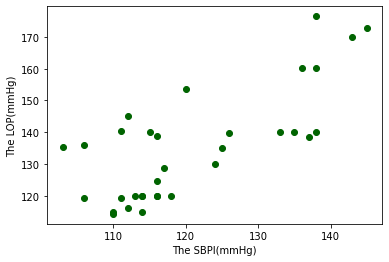

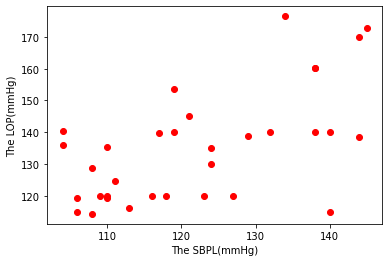

In [6]:
modTIP = TIP
#繪製散點圖,examDf.jt爲X軸，examDf.hk爲Y軸
plt.scatter(modTIP.SBPI,modTIP.LOP,color = 'darkgreen',label = "Exam Data")
#添加圖的標籤（x軸，y軸）
plt.xlabel("The SBPI(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像
plt.scatter(modTIP.SBPL,modTIP.LOP,color = 'red',label = "Exam Data")
plt.xlabel("The SBPL(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像
# plt.scatter(modTIP.SBPM,modTIP.LOP,color = 'blue',label = "Exam Data")
# plt.xlabel("The SBPM(mmHg)")#設置X軸標籤
# plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
# plt.show()#顯示圖像

             SBPI        SBPL       DBPI        DBPL        BPMI        BPML  \
count   33.000000   33.000000  33.000000   33.000000   33.000000   33.000000   
mean   120.848485  122.090909  76.636364   75.363636   83.969697   83.030303   
std     11.921937   13.335488  11.296621   11.120977   10.938707   10.023363   
min    103.000000  104.000000  62.000000   60.000000   65.000000   64.000000   
25%    112.000000  110.000000  68.000000   67.000000   76.000000   76.000000   
50%    116.000000  119.000000  73.000000   73.000000   83.000000   83.000000   
75%    133.000000  134.000000  86.000000   84.000000   92.000000   92.000000   
max    145.000000  145.000000  99.000000  101.000000  107.000000  103.000000   

              LOP  
count   33.000000  
mean   135.300000  
std     17.567815  
min    114.300000  
25%    120.000000  
50%    135.300000  
75%    140.000000  
max    176.500000  
          SBPI      SBPL      DBPI      DBPL      BPMI      BPML       LOP
SBPI  1.000000  0.852175

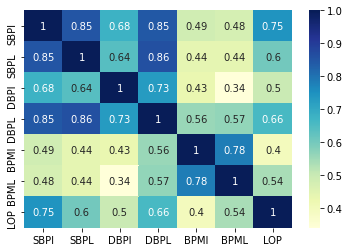

In [7]:
print(modTIP.describe())
rDf = modTIP.corr()#查看數據間的相關係數
print(rDf)
sns.heatmap(modTIP.corr(),annot=True, cmap="YlGnBu")

In [8]:
def t_test(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1)
    std2 = np.std(group2)
    nobs1 = len(group1)
    nobs2 = len(group2)
    
    modified_std1 = np.sqrt(np.float32(nobs1)/
                    np.float32(nobs1-1)) * std1
    modified_std2 = np.sqrt(np.float32(nobs2)/
                    np.float32(nobs2-1)) * std2
    (statistic, pvalue) = stats.ttest_ind_from_stats( 
               mean1=mean1, std1=modified_std1, nobs1=nobs1,   
               mean2=mean2, std2=modified_std2, nobs2=nobs2 )
    return statistic, pvalue

In [9]:
print(t_test(modTIP.SBPI, modTIP.SBPL))
# print(t_test(modTIP.SBPI, modTIP.SBPM))
# print(t_test(modTIP.SBPL, modTIP.SBPM))
print(t_test(modTIP.DBPI, modTIP.DBPL))
# print(t_test(modTIP.DBPI, modTIP.DBPM))
# print(t_test(modTIP.DBPL, modTIP.DBPM))
print(t_test(modTIP.BPMI, modTIP.BPML))
# print(t_test(modTIP.BPMI, modTIP.BPMM))
# print(t_test(modTIP.BPML, modTIP.BPMM))
print(t_test(modTIP.SBPI, modTIP.LOP))
print(t_test(modTIP.SBPL, modTIP.LOP))
# print(t_test(modTIP.SBPM, modTIP.LOP))
print(t_test(modTIP.DBPI, modTIP.LOP))
print(t_test(modTIP.DBPL, modTIP.LOP))
# print(t_test(modTIP.DBPM, modTIP.LOP))
print(t_test(modTIP.BPMI, modTIP.LOP))
print(t_test(modTIP.BPML, modTIP.LOP))
# print(t_test(modTIP.BPMM, modTIP.LOP))
print(t_test(modTIP.LOP, modTIP.LOP))

(-0.39900076790123173, 0.6912208914499901)
(0.4612165661904565, 0.6462069052235226)
(0.3637239444011327, 0.7172629566578634)
(-3.910185079637679, 0.0002255229534749461)
(-3.4403673651913595, 0.0010277149961596887)
(-16.134752771206383, 3.0863300441207467e-24)
(-16.559704649624877, 8.024269421672735e-25)
(-14.24836878935568, 1.5965095568726735e-21)
(-14.845483898771814, 2.1047655049375466e-22)
(0.0, 1.0)


自變量---源數據: (33,) ；  訓練集: (26,) ；  測試集: (7,)
因變量---源數據: (33,) ；  訓練集: (26,) ；  測試集: (7,)


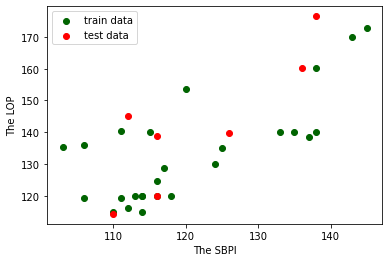

In [10]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train,X_test,Y_train,Y_test = train_test_split(modTIP.SBPI,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.SBPI.shape, "；  訓練集:",X_train.shape, "；  測試集:",X_test.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train.shape, "；  測試集:",Y_test.shape)
#散點圖
plt.scatter(X_train, Y_train, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test, Y_test, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPI")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

自變量---源數據: (33,) ；  訓練集: (26,) ；  測試集: (7,)
因變量---源數據: (33,) ；  訓練集: (26,) ；  測試集: (7,)


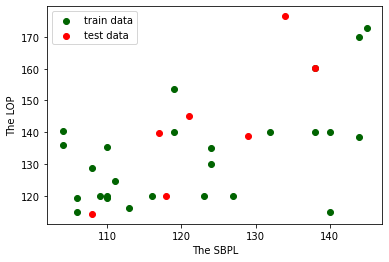

In [11]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(modTIP.SBPL,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.SBPL.shape, "；  訓練集:",X_train2.shape, "；  測試集:",X_test2.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train2.shape, "；  測試集:",Y_test2.shape)
#散點圖
plt.scatter(X_train2, Y_train2, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test2, Y_test2, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPL")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

In [12]:
# #拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
# X_train3,X_test3,Y_train3,Y_test3 = train_test_split(modTIP.SBPM,modTIP.LOP,train_size=0.8,random_state=1)
# #train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
# print("自變量---源數據:",modTIP.SBPM.shape, "；  訓練集:",X_train3.shape, "；  測試集:",X_test3.shape)
# print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train3.shape, "；  測試集:",Y_test3.shape)
# #散點圖
# plt.scatter(X_train3, Y_train3, color="darkgreen", label="train data")#訓練集爲深綠色點
# plt.scatter(X_test3, Y_test3, color="red", label="test data")#測試集爲紅色點
# #添加標籤
# plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
# plt.xlabel("The SBPM")#添加 X 軸名稱
# plt.ylabel("The LOP")#添加 Y 軸名稱
# plt.show()#顯示散點圖

In [13]:
# plt.scatter(modTIP.SBP1, modTIP.TIP, color="darkgreen", label="分布")

In [14]:
# X_1 = np.array([1 for i in range(28)])
# x_train = np.array(X_train)
# x = np.zeros((28,2))
# x[:,0] = X_1
# x[:,1] = x_train
# #線性迴歸訓練
# model = LinearRegression()
# model.fit(x,Y_train)#調用線性迴歸包
# a  = model.intercept_#截距
# b = model.coef_#迴歸係數
# #訓練數據的預測值
# y_train_pred = model.predict(x)
# #繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
# plt.plot(X_train, y_train_pred, color='blue', linewidth=2, label="best line")
# #測試數據散點圖
# plt.scatter(X_train, Y_train, color='darkgreen', label="train data")
# plt.scatter(X_test, Y_test, color='red', label="test data")
# #添加圖標標籤
# plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
# plt.xlabel("The SBP")#添加 X 軸名稱
# plt.ylabel("The TIP")#添加 Y 軸名稱
# plt.show()#顯示圖像
# print("擬合參數:截距",a,",迴歸係數：",b)
# print("最佳擬合線: Y = ",round(a,2),"+",round(b[1],2),"* X")
# #顯示線性方程，並限制參數的小數位爲兩位

In [15]:
q = np.array(X_train)#q原先shape是(28,0)
np.shape(q)
q = np.reshape(q, (26,1))#reshape換成(28,1)

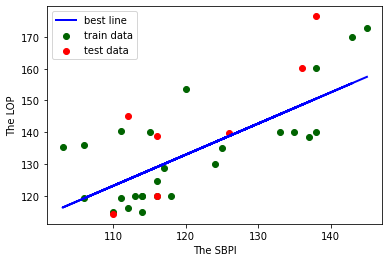

擬合參數:截距 15.430039768767216 ,迴歸係數： [0.97929769]
最佳擬合線: Y =  15.43 + 0.98 * X


In [16]:
model = LinearRegression()
model.fit(q,Y_train)#調用線性迴歸包
# model.fit(X_train,Y_train)
a  = model.intercept_#截距
b = model.coef_#迴歸係數
#訓練數據的預測值
y_train_pred = model.predict(q)
#繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
plt.plot(X_train, y_train_pred, color='blue', linewidth=2, label="best line")
#測試數據散點圖
plt.scatter(X_train, Y_train, color='darkgreen', label="train data")
plt.scatter(X_test, Y_test, color='red', label="test data")
#添加圖標標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPI")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示圖像
print("擬合參數:截距",a,",迴歸係數：",b)
print("最佳擬合線: Y = ",round(a,2),"+",round(b[0],2),"* X")
#顯示線性方程，並限制參數的小數位爲兩位

In [17]:
q2 = np.array(X_train2)#q原先shape是(28,0)
np.shape(q2)
q2 = np.reshape(q2, (26,1))#reshape換成(28,1)

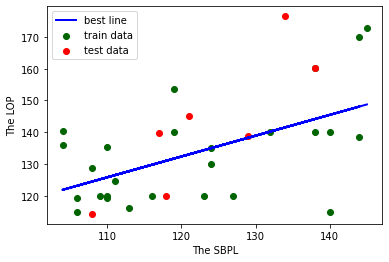

擬合參數:截距 53.714081820978166 ,迴歸係數： [0.65541526]
最佳擬合線: Y =  53.71 + 0.66 * X


In [18]:
model2 = LinearRegression()
model2.fit(q2,Y_train2)#調用線性迴歸包
# model.fit(X_train,Y_train)
a2  = model2.intercept_#截距
b2 = model2.coef_#迴歸係數
#訓練數據的預測值
y_train_pred2 = model2.predict(q2)
#繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
plt.plot(X_train2, y_train_pred2, color='blue', linewidth=2, label="best line")
#測試數據散點圖
plt.scatter(X_train2, Y_train2, color='darkgreen', label="train data")
plt.scatter(X_test2, Y_test2, color='red', label="test data")
#添加圖標標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPL")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示圖像
print("擬合參數:截距",a2,",迴歸係數：",b2)
print("最佳擬合線: Y = ",round(a2,2),"+",round(b2[0],2),"* X")
#顯示線性方程，並限制參數的小數位爲兩位

In [19]:
# q3 = np.array(X_train3)#q原先shape是(28,0)
# np.shape(q3)
# q3 = np.reshape(q3, (28,1))#reshape換成(28,1)

In [20]:
# model3 = LinearRegression()
# model3.fit(q3,Y_train3)#調用線性迴歸包
# # model.fit(X_train,Y_train)
# a3  = model3.intercept_#截距
# b3 = model3.coef_#迴歸係數
# #訓練數據的預測值
# y_train_pred3 = model3.predict(q3)
# #繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
# plt.plot(X_train3, y_train_pred3, color='blue', linewidth=2, label="best line")
# #測試數據散點圖
# plt.scatter(X_train3, Y_train3, color='darkgreen', label="train data")
# plt.scatter(X_test3, Y_test3, color='red', label="test data")
# #添加圖標標籤
# plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
# plt.xlabel("The SBPM")#添加 X 軸名稱
# plt.ylabel("The LOP")#添加 Y 軸名稱
# plt.show()#顯示圖像
# print("擬合參數:截距",a3,",迴歸係數：",b3)
# print("最佳擬合線: Y = ",round(a3,2),"+",round(b3[0],2),"* X")
# #顯示線性方程，並限制參數的小數位爲兩位